In [2]:
!pip install --upgrade pythainlp
!pip install pyLDAvis
!pip install sefr_cut
# !pip install -U pandas-profiling
# !pip install deepcut
# !pip install tensorflow_text

     |████████████████████████████████| 11.0MB 25.0MB/s 
     |████████████████████████████████| 747kB 37.6MB/s 
     |████████████████████████████████| 1.7MB 32.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 45.1MB/s 
     |████████████████████████████████| 15.3MB 276kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=3a73113436508283dfd605717178a4e2970b3537afdde8c33d3018493c3b89eb
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience

     |████████████████████████████████| 8.7MB 19.3MB/s 
     |████████████████████████████████| 327kB 42.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85408 sha256=445e7551254bd2dcaedfc921bf909626a873d5f67ad21fbe2972d97140af2492
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


import pythainlp
from pythainlp.tokenize import sent_tokenize, word_tokenize
import gensim

import sefr_cut
sefr_cut.load_model(engine='tl-deepcut-ws1000')
# sefr_cut.load_model(engine='ws1000')


# import tensorflow_hub as hub
# import tensorflow_text
# import tensorflow as tf

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

loading model.....
Success


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

In [4]:
## mount__drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading 


In [2]:
## load data file 
df= pd.read_csv('/content/drive/MyDrive/CRM_project/CustomerReviews.csv')
df.head()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0


# Data Cleansing

In [3]:
thai_stop = pythainlp.corpus.common.thai_stopwords()


In [4]:
## install deepcut 
!pip install git+git://github.com/rkcosmos/deepcut.git

  Cloning git://github.com/rkcosmos/deepcut.git to /tmp/pip-req-build-bbfow95p
  Running command git clone -q git://github.com/rkcosmos/deepcut.git /tmp/pip-req-build-bbfow95p
  Created wheel for deepcut: filename=deepcut-0.7.0.0-cp37-none-any.whl size=2011601 sha256=31423135e98e044c94f1d5319a5d12c21c96f448ee651ec03b54138ee03271d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-2185_xh1/wheels/1d/a7/f3/c9794455c7ece304440686e3e7b2ad895e1d0e7dec27d49a55
Successfully built deepcut


# Clean special and puctuation word 

In [ ]:
# # # text  Processing 
# # # word tokenization 

# #oo = 'อีกอย่างที่ชอบก็คือไอศกรีมรสชาเขียว และรสข้าว ไปทีไรสั่ง 2 ถ้วยตลอด{'
# oo.strip()
# oo= re.sub(r'\u200b', '', oo)
# oo = re.sub(r'[ๆฯ!#$&%\"\'()*+,-./:;<=>?@\[\]\\^_`{}|~]','', oo)
# oo = re.sub(r'\d',' ', oo)
# print(oo)
# #print(oo.strip().lower())
# #print(word_tokenize(oo,engine='deepcut') )
# print(sent_tokenize(text= oo, engine = 'whitespace+newline'))
# #pythainlp.tokenize.sent_tokenize(text: str, engine: str = 'whitespace+newline')
# # w for st in sent_tokenize(x, engine='whitespace+newline') for w in sefr_cut.tokenize(st,k=100)])

# Creating Fuction word cleansing and Sentens Tokennization  

In [5]:
#word cleansing 
import string
result = string.punctuation 
list_pc = [i for i in result ]
list_all = list_pc + ['\u200b']
#print(list_pc)
def clean_word(text):
  # special string
  text = ''.join(str(n) for n in text if ((n not in list_pc) and (n.isnumeric() == False)))
  text = re.sub(r'\u200b','',text)
  text = sent_tokenize(text, engine='whitespace+newline')  
  return text 
clean_word('มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวกันได้แล้ว แต่ระหว่างโต๊ะยังมีฉากกั้นอยู่ ')

['มาทานช่วงนี้',
 'สามารถนั่งโต๊ะเดียวกัน',
 'หม้อเดียวกันได้แล้ว',
 'แต่ระหว่างโต๊ะยังมีฉากกั้นอยู่']

# EDA Sentense len 

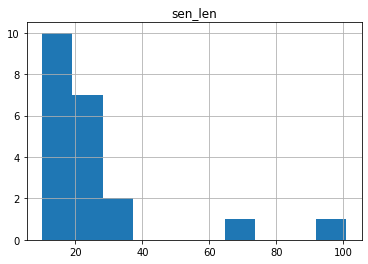

In [6]:
df['sentens_clean'] = df['Review'].apply(clean_word)
df['sen_len'] = df['sentens_clean'].apply(len)
df.hist('sen_len')
plt.savefig('/content/drive/MyDrive/CRM_project/Hw9/word_distri.png',dpi = 150 , format = 'png')

# Word Tokenization 

In [7]:
df.head()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,sentens_clean,sen_len
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,[ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารัก...,12
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"[นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง, คิดถึงโมโม่, พา...",25
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"[มาทานช่วงนี้, สามารถนั่งโต๊ะเดียวกัน, หม้อเดี...",69
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"[ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ, ในราคาไม่โหดจนเ...",14
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"[เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก, ๆ, ประก...",24


In [8]:
### Word token sentense 
def word_token(sent) :
    x = [    w   for word in sent for w in word_tokenize(word,engine='deepcut')]
    return x


In [9]:
df['words_tokens'] = df['sentens_clean'].apply(word_token)

In [10]:
#newmm 
df['words_tokens_newmm'] = df['sentens_clean'].apply(lambda x : [  w   for word in x for w in word_tokenize(word,engine='newmm')] )
df.head()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,sentens_clean,sen_len,words_tokens,words_tokens_newmm
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,[ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารัก...,12,"[ที่, สำคัญ, ของ, ร้าน, นี้, คือ, บริการ, ดี, ...","[ที่, สำคัญ, ของ, ร้าน, นี้, คือ, บริการ, ดีมา..."
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"[นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง, คิดถึงโมโม่, พา...",25,"[นึก, ถึง, ชาบูญี่ปุ่น, ยัง, ไง, ก็, ต้อง, คิด...","[นึกถึง, ชาบู, ญี่ปุ่น, ยังไง, ก็, ต้อง, คิดถึ..."
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"[มาทานช่วงนี้, สามารถนั่งโต๊ะเดียวกัน, หม้อเดี...",69,"[มา, ทาน, ช่วง, นี้, สามารถ, นั่ง, โต๊ะ, เดียว...","[มา, ทาน, ช่วงนี้, สามารถ, นั่ง, โต๊ะ, เดียวกั..."
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"[ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ, ในราคาไม่โหดจนเ...",14,"[ถ้า, นึก, ถึง, ชาบู, ที่, มี, เนื้อ, เน้น, ๆ,...","[ถ้า, นึกถึง, ชาบู, ที่, มี, เนื้อ, เน้น, ๆ, ใ..."
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"[เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก, ๆ, ประก...",24,"[เดิน, มา, หน้า, ร้าน, แล้ว, ได้, กลิ่น, ชาบูห...","[เดิน, มา, หน้า, ร้าน, แล้ว, ได้กลิ่น, ชาบู, ห..."


# Remove common word and stop word keep only signification words

In [11]:
## Removce common word 
stop_word = list(pythainlp.corpus.common.thai_stopwords()) + ['ร้าน','บาท','ทาน','กิน','นะ','ถ้า'] + [' ', '  ', '\n', 'ร้าน', 'นะคะ', 'เค้า', 'กก', 'ผม', 'คน']
df['token_clean_common'] = df['words_tokens_newmm'].apply(lambda x : [y for y in x  if y not in stop_word]  )
df.head()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,sentens_clean,sen_len,words_tokens,words_tokens_newmm,token_clean_common
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,[ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารัก...,12,"[ที่, สำคัญ, ของ, ร้าน, นี้, คือ, บริการ, ดี, ...","[ที่, สำคัญ, ของ, ร้าน, นี้, คือ, บริการ, ดีมา...","[บริการ, ดีมาก, พนักงาน, น่ารัก, สะอาดสะอ้าน, ..."
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"[นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง, คิดถึงโมโม่, พา...",25,"[นึก, ถึง, ชาบูญี่ปุ่น, ยัง, ไง, ก็, ต้อง, คิด...","[นึกถึง, ชาบู, ญี่ปุ่น, ยังไง, ก็, ต้อง, คิดถึ...","[นึกถึง, ชาบู, ญี่ปุ่น, คิดถึง, โม, โม่, พาราไ..."
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"[มาทานช่วงนี้, สามารถนั่งโต๊ะเดียวกัน, หม้อเดี...",69,"[มา, ทาน, ช่วง, นี้, สามารถ, นั่ง, โต๊ะ, เดียว...","[มา, ทาน, ช่วงนี้, สามารถ, นั่ง, โต๊ะ, เดียวกั...","[นั่ง, โต๊ะ, หม้อ, โต๊ะ, ยังมี, ฉาก, กั้น, น้ำ..."
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"[ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ, ในราคาไม่โหดจนเ...",14,"[ถ้า, นึก, ถึง, ชาบู, ที่, มี, เนื้อ, เน้น, ๆ,...","[ถ้า, นึกถึง, ชาบู, ที่, มี, เนื้อ, เน้น, ๆ, ใ...","[นึกถึง, ชาบู, เนื้อ, ราคา, โหด, เกินไป, นึกถึ..."
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"[เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก, ๆ, ประก...",24,"[เดิน, มา, หน้า, ร้าน, แล้ว, ได้, กลิ่น, ชาบูห...","[เดิน, มา, หน้า, ร้าน, แล้ว, ได้กลิ่น, ชาบู, ห...","[เดิน, หน้า, ได้กลิ่น, ชาบู, หอ, มมาก, โปร, บั..."


In [12]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf  -P '/content/drive/MyDrive/THSarabunNew.ttf'

--2021-06-15 13:00:00--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-06-15 13:00:00--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/THSarabunNew.ttf/thsarabunnew-webfont.ttf.6’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.00

In [13]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf  -P '/content/drive/MyDrive/THSarabunNew.ttf'
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/THSarabunNew.ttf/thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2021-06-15 13:00:00--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-06-15 13:00:00--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/THSarabunNew.ttf/thsarabunnew-webfont.ttf.7’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03

In [14]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words1 = [' '.join(i) for i in x ]   
    all_words = ' '.join(all_words1)
    #all_words 
    all_words = all_words.split()
    
    #freq_dist = nltk.FreqDist(all_words)
    ferq_dist = dict()
    for i in all_words :
      if i in ferq_dist :
        ferq_dist[i] += 1
      else :
        ferq_dist[i] = 1
    words_df = pd.DataFrame({'word':list(ferq_dist.keys()), 'count':list(ferq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(font_path='/content/drive/MyDrive/THSarabunNew.ttf/thsarabunnew-webfont.ttf',
        width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(ferq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()
    #plt.savefig('/content/drive/MyDrive/CRM_project/Hw9/word_tk_fre.png',dpi = 150 , format = 'png')

In [15]:
#all_words = ' '.join(  text for text in df.loc[:,'token_clean_common'])
# for i in df.loc[:,'token_clean_common'] :
#     print(' '.join(i))

# all_words1 = [' '.join(i) for i in df.loc[:,'token_clean_common']]   
# all_words = ' '.join(all_words1)
# all_words

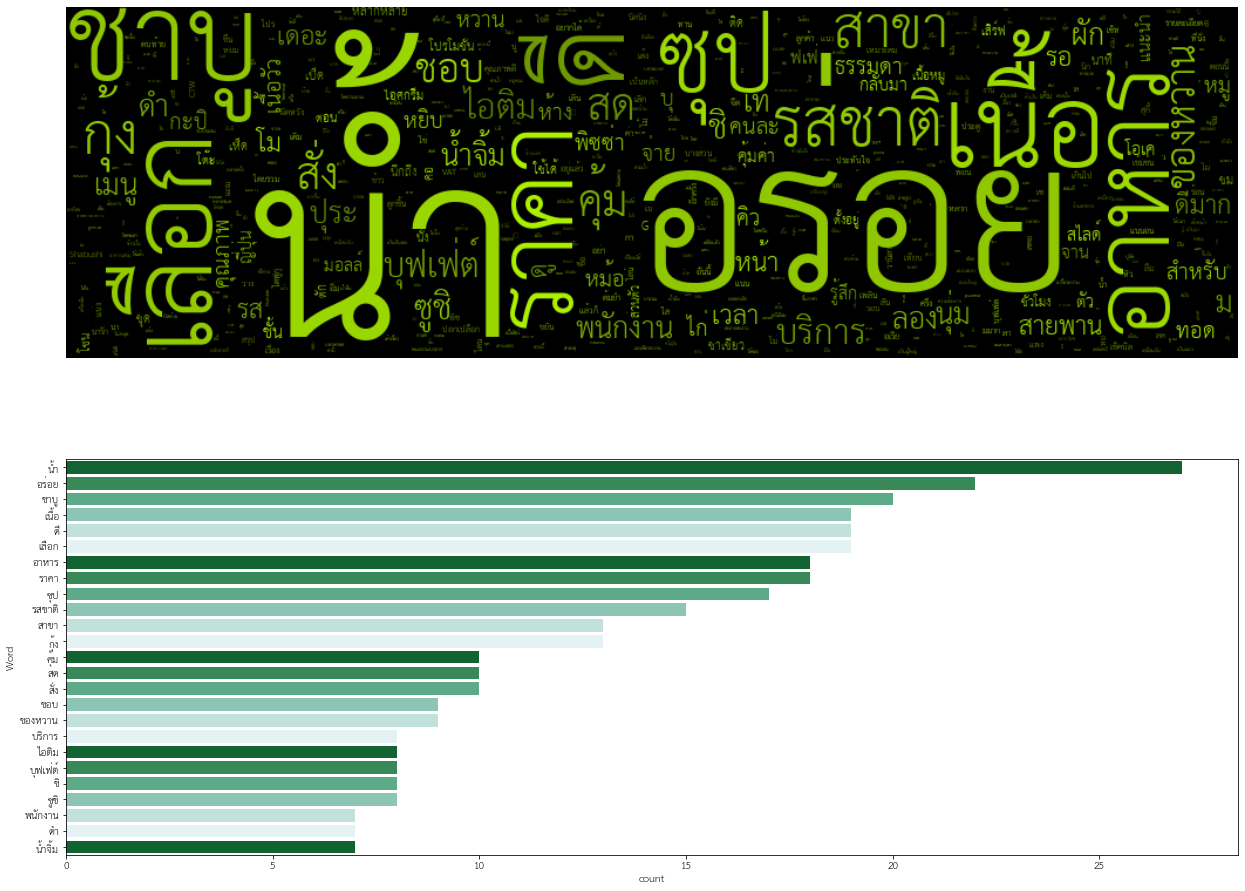

In [16]:
freq_words(df.loc[:,'token_clean_common'], 25)

#Create Dictionary (Bag of word)

In [17]:
#Create Dictionary
df.loc[10:20,'token_clean_common']
dict_word =  df.token_clean_common.to_list()
#texts = [[text for text in doc.split(',')] for doc in dict_word]
dictionary = gensim.corpora.Dictionary(dict_word)

In [18]:
pprint(str(dictionary.token2id.items()))

("dict_items([('ข้างนอก', 0), ('ความต้องการ', 1), ('คอ', 2), ('คุณภาพ', 3), "
 "('คุณภาพดี', 4), ('คุ้ม', 5), ('จำกัด', 6), ('ซุป', 7), ('ดำ', 8), ('ดี', "
 "9), ('ดีมาก', 10), ('ถาด', 11), ('ถาม', 12), ('น่ารัก', 13), ('น้ำ', 14), "
 "('น้ำจิ้ม', 15), ('บริการ', 16), ('ประทับใจ', 17), ('พนักงาน', 18), "
 "('พอกับ', 19), ('รสชาติ', 20), ('ราคา', 21), ('สรุป', 22), ('สะอาดสะอ้าน', "
 "23), ('สัน', 24), ('หลากหลาย', 25), ('อร่อย', 26), ('อันนี้', 27), ('อาหาร', "
 "28), ('เคลม', 29), ('เซ็ท', 30), ('เต้าเจี้ยว', 31), ('เนื้อ', 32), ('เป็ด', "
 "33), ('เผ็ด', 34), ('แบบนี้', 35), ('แปลกใหม่', 36), ('แฟน', 37), ('โดยรวม', "
 "38), ('โมจิ', 39), ('ใส่ใจ', 40), ('ไม่ต้อง', 41), ('ไอติม', 42), ('CTW', "
 "43), ('Terminal', 44), ('กา', 45), ('การงด', 46), ('คิดถึง', 47), ('ชาบู', "
 "48), ('ญี่ปุ่น', 49), ('ฐาน', 50), ('ทะยอย', 51), ('ทำงาน', 52), ('ที่ทาง', "
 "53), ('นาที', 54), ('นึกถึง', 55), ('พนักงานบริการ', 56), ('พระราม', 57), "
 "('พรีเมียม', 58), ('พาราไดซ์', 59), ('มาตรา', 60), ('มี

In [43]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in dict_word]
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

# Topic Modeling with LDA

In [44]:
num_topics = 3
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents #10
iterations = 100
eval_every = 1 # Don't evaluate model perplexity, takes too much time

# Make a index to word dictionary.
temp = dictionary[0] # This is only to "load" the dictionary
id2word = dictionary.id2token

%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 584 ms, sys: 92.5 ms, total: 676 ms
Wall time: 585 ms


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

# Genarate Modeling 

In [45]:
pprint(model.print_topics(num_words=10))
doc_lda = model[gensim_corpus]

# Compute Perplexity
print('\nPerplexity: ', model.log_perplexity(gensim_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=model, texts=df['token_clean_common'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.024*"น้ำ" + 0.019*"อร่อย" + 0.017*"ราคา" + 0.017*"เนื้อ" + 0.016*"ซุป" + '
  '0.016*"ชาบู" + 0.015*"เลือก" + 0.013*"ดี" + 0.012*"รสชาติ" + 0.012*"อาหาร"'),
 (1,
  '0.019*"น้ำ" + 0.016*"ชาบู" + 0.016*"ดี" + 0.014*"อาหาร" + 0.014*"เลือก" + '
  '0.014*"อร่อย" + 0.014*"เนื้อ" + 0.013*"กุ้ง" + 0.013*"ราคา" + 0.011*"ซุป"'),
 (2,
  '0.021*"น้ำ" + 0.020*"อร่อย" + 0.017*"อาหาร" + 0.017*"เลือก" + 0.016*"ดี" + '
  '0.015*"เนื้อ" + 0.015*"ชาบู" + 0.014*"รสชาติ" + 0.013*"สาขา" + 0.013*"ซุป"')]

Perplexity:  -5.981824006151941
Coherence Score:  0.2258475806280523


# Topic Visualization

In [46]:
pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)
 
#pyLDAvis.save_html(p, '/content/drive/MyDrive/CRM_project/Hw9/lda.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.027684 -0.005628       1        1  48.549173
0      0.021114 -0.013255       2        1  32.588741
2      0.006570  0.018883       3        1  18.862086, topic_info=        Term       Freq      Total Category  logprob  loglift
26     อร่อย  20.000000  20.000000  Default  30.0000  30.0000
16    บริการ   6.000000   6.000000  Default  29.0000  29.0000
14       น้ำ  25.000000  25.000000  Default  28.0000  28.0000
28     อาหาร  16.000000  16.000000  Default  27.0000  27.0000
117     สั่ง   7.000000   7.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
211     เดอะ   1.137053   6.181587   Topic3  -5.3011  -0.0251
171     หน้า   1.087145   6.059911   Topic3  -5.3460  -0.0501
73        โม   1.075645   6.008956   Topic3  -5.3566  -0.0523
115       สด   1.144757   9.225568   Topic3  -5.2943  -0.4188
78   ของหวาน   1.113001   8.454997   Topic3  -5.3225  -0.3597

[217 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
43        3  0.688754     CTW
516       2  0.970447    mall
290       1  0.813931  กลับมา
290       2  0.271310  กลับมา
240       1  0.772882    กุ้ง
...     ...       ...     ...
148       2  0.567918     ไผ่
149       2  0.555837     ไม้
42        1  0.499250   ไอติม
42        2  0.374437   ไอติม
42        3  0.124812   ไอติม

[237 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [47]:
# p

# Show top list word with probability value

In [48]:
result = []
topn = 3

for n in range(num_topics):
    temp_df = pd.DataFrame(model.get_topic_terms(n, topn=topn), columns=['word_id','prob'])
    temp_df['topic'] = n
    result.append(temp_df)

topic_terms_df = pd.concat(result)
topic_terms_df['word'] = topic_terms_df['word_id'].apply(lambda x: dictionary.get(x))
topic_terms_df.head()

,word_id,prob,topic,word
0,14,0.023874,0,น้ำ
1,26,0.019132,0,อร่อย
2,21,0.016726,0,ราคา
0,14,0.018889,1,น้ำ
1,48,0.015972,1,ชาบู


In [49]:
topic_terms_df['word'].unique()

array(['น้ำ', 'อร่อย', 'ราคา', 'ชาบู', 'ดี', 'อาหาร'], dtype=object)

In [50]:
topic_terms_df.to_pickle('topic_term.pkl')

# Apply model on the each review

In [51]:
df['topics'] = df['token_clean_common'].apply(lambda x:  model.get_document_topics(dictionary.doc2bow(x))[0][0])
df['score'] = df['token_clean_common'].apply(lambda x:   model.get_document_topics(dictionary.doc2bow(x))[0][1])

# Final result

In [52]:
df

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,sentens_clean,sen_len,words_tokens,words_tokens_newmm,token_clean_common,topics,score
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,[ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารัก...,12,"[ที่, สำคัญ, ของ, ร้าน, นี้, คือ, บริการ, ดี, ...","[ที่, สำคัญ, ของ, ร้าน, นี้, คือ, บริการ, ดีมา...","[บริการ, ดีมาก, พนักงาน, น่ารัก, สะอาดสะอ้าน, ...",2,0.998674
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"[นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง, คิดถึงโมโม่, พา...",25,"[นึก, ถึง, ชาบูญี่ปุ่น, ยัง, ไง, ก็, ต้อง, คิด...","[นึกถึง, ชาบู, ญี่ปุ่น, ยังไง, ก็, ต้อง, คิดถึ...","[นึกถึง, ชาบู, ญี่ปุ่น, คิดถึง, โม, โม่, พาราไ...",2,0.998366
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"[มาทานช่วงนี้, สามารถนั่งโต๊ะเดียวกัน, หม้อเดี...",69,"[มา, ทาน, ช่วง, นี้, สามารถ, นั่ง, โต๊ะ, เดียว...","[มา, ทาน, ช่วงนี้, สามารถ, นั่ง, โต๊ะ, เดียวกั...","[นั่ง, โต๊ะ, หม้อ, โต๊ะ, ยังมี, ฉาก, กั้น, น้ำ...",0,0.999534
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"[ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ, ในราคาไม่โหดจนเ...",14,"[ถ้า, นึก, ถึง, ชาบู, ที่, มี, เนื้อ, เน้น, ๆ,...","[ถ้า, นึกถึง, ชาบู, ที่, มี, เนื้อ, เน้น, ๆ, ใ...","[นึกถึง, ชาบู, เนื้อ, ราคา, โหด, เกินไป, นึกถึ...",0,0.997818
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"[เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก, ๆ, ประก...",24,"[เดิน, มา, หน้า, ร้าน, แล้ว, ได้, กลิ่น, ชาบูห...","[เดิน, มา, หน้า, ร้าน, แล้ว, ได้กลิ่น, ชาบู, ห...","[เดิน, หน้า, ได้กลิ่น, ชาบู, หอ, มมาก, โปร, บั...",2,0.998050
5,6,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,12f2b56b28bb4849a92690cedc1cc50a,กินให้อิ่ม ที่ momo,ร้านบุฟเฟ่ ชาบูแนวญี่ปุ่น สายเนื้อหมู เนื้อวัว...,4.0,"[ร้านบุฟเฟ่, ชาบูแนวญี่ปุ่น, สายเนื้อหมู, เนื้...",12,"[ร้าน, บุฟเฟ่, ชาบู, แนว, ญี่ปุ่น, สาย, เนื้อห...","[ร้าน, บุ, ฟเฟ่, ชาบู, แนว, ญี่ปุ่น, สาย, เนื้...","[บุ, ฟเฟ่, ชาบู, แนว, ญี่ปุ่น, สาย, เนื้อหมู, ...",0,0.997891
6,7,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,f2628bf47a394345b133fec76a79661d,ชาบู - สุกกี้สไลต์ญี่ปุ่นที่แท้ทรู,Number 20 : โมโม – พาราไดส์ (สาขาเดอะมอลบางกะป...,4.0,"[Number, โมโม, –, พาราไดส์, สาขาเดอะมอลบางกะปิ...",26,"[Number, โมโม, –, พาราไดส์, สาขา, เดอะมอลบางกะ...","[Number, โม, โม, –, พารา, ได, ส์, สาขา, เดอะ, ...","[Number, โม, โม, –, พารา, ได, ส์, สาขา, เดอะ, ...",1,0.999015
7,8,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,backscrash,ร้านชาบูเฟรนไชส์ ที่ราคาเหมาะสมกับคุณภาพ ถือว่...,ร้านชาบูเฟรนไชส์รสชาติดีมากคุ้มค่าเหมาะสมกับรา...,4.0,[ร้านชาบูเฟรนไชส์รสชาติดีมากคุ้มค่าเหมาะสมกับร...,13,"[ร้าน, ชาบูเฟรนไชส์, รสชาติ, ดี, มาก, คุ้ม, ค่...","[ร้าน, ชาบู, เฟรนไชส์, รสชาติ, ดีมาก, คุ้มค่า,...","[ชาบู, เฟรนไชส์, รสชาติ, ดีมาก, คุ้มค่า, เหมาะ...",1,0.998830
8,9,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,a477a5812ada4d5b80fd04fca22bdbca,อร่อยคุ้ม ของทานเล่นเยอะมาก,มา านที่ขาบูชิต้องมาตอนหิว ไม่งั้นจะไม่คุ้มนะค...,4.0,"[มา, านที่ขาบูชิต้องมาตอนหิว, ไม่งั้นจะไม่คุ้ม...",16,"[มา, าน, ที่, ขา, บูชิ, ต้อง, มา, ตอน, หิว, ไม...","[มา, าน, ที่, ขา, บู, ชิ, ต้อง, มา, ตอน, หิว, ...","[าน, ขา, บู, ชิ, ตอน, หิว, ไม่งั้น, คุ้ม, ฮ่า,

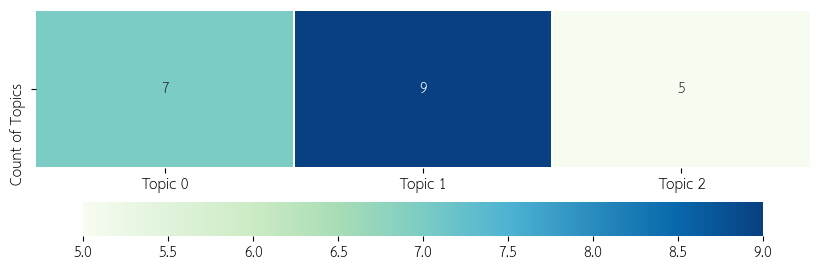

In [53]:
sns_data = pd.DataFrame({
  'Columns': ["Topic " + str(i) for i in range(num_topics)], 
  'Rows': ["Count of Topics" for i in range(num_topics)], 
  'value': [len(df[df['topics'] == i]) for i in range(num_topics)]
})
result = sns_data.pivot(index='Rows', columns='Columns', values='value')

fig, ax = plt.subplots(1, 1, figsize = (10, 3), dpi=100)
sns_plot = sns.heatmap(result, annot=True, fmt="g", cmap='GnBu', linewidths=.5, cbar_kws={"orientation": "horizontal"})

# ADDED: Remove labels.
ax.set_ylabel('')    
ax.set_xlabel('')

# plt.show() sns_plot.savefig("output.png")
sns_plot.figure.savefig('/content/drive/MyDrive/CRM_project/Hw9/heatmap_final.png',dpi = 150 , format = 'png')
#sns_plot..savefig("output.png")

## visualization  on the topic word 

In [54]:
dd = {}
def word_dict(i) :
      xx =   df[df.topics == i ]['token_clean_common'].to_list()#.head(10)]
      ee =  set([iii for ii in xx for iii in  ii])
      return ee
    

In [55]:
print('Topic0',word_dict(0))
print('Topic1',word_dict(1))
print('Topic2',word_dict(2))


Topic0 {'อร่อย', 'บู', 'โม', 'จำได้', 'สดๆ', 'โต๊ะ', 'ยู', 'กรุบ', 'รอ', 'สั่ง', 'อยู่แล้ว', 'ราคา', 'น้ำจิ้ม', 'แวะ', 'หวาน', 'รู้จัก', 'คุ้มค่า', 'ถ้วย', 'ซูชิ', 'ไหว', 'โดยเฉพาะ', 'ไว', 'ลอง', 'แพง', 'ขึ้นใจ', 'คามี', 'ชื่อ', 'มอลล์', 'รี', 'ด้านใน', 'หนึบ', 'ที่นั่ง', 'ติดกับ', 'จิ้ม', 'เป็ด', 'MCC', 'ที่ไหนได้', 'นม', 'G', 'หมู', 'เบ', 'ณ์', 'นุ่ม', 'ล', 'โควิด', 'หลากหลาย', 'เค็ม', 'บุฟเฟต์', 'ลิ้น', 'ชิ', 'ซอส', 'เนื้อ', 'หลังจากที่', 'ร้อน', 'ชั้น', 'เกินไป', 'ขยัน', 'พิซ', 'รี่', 'โซน', 'หล่ะ', 'ตก', 'จืด', 'เนื้อวัว', 'บุ', 'แตา', 'รู้สึก', 'พี่', 'เดิน', 'สาขา', 'ค่ายมวย', 'พอน', 'พิซซ่า', 'ข้าว', 'ธรรมดา', 'ชู', 'ลี', 'อยากได้', 'กะปิ', 'ส่วนตัว', 'ดำ', 'สรุป', 'คนละ', 'ประตู', 'บางส่วน', 'ของหวาน', 'เต็ม', 'สด', 'ไอศกรีม', 'ตัวเลือก', 'ต่างกัน', 'สปา', 'ซุป', 'เข้ากัน', 'หน้า', 'เป็นผู้ใหญ่', 'ชอบ', 'พลาด', 'หลายครั้ง', 'สามรส', 'แกงเขียวหวาน', 'น้ำ', 'ววว', 'รส', 'ไข่', 'โม่', 'อเรีย', 'เงินสด', 'แดง', 'มีชื่อ', 'เลี่ยน', 'บริการ', 'อาหาร', 'กินที่', 'หม้อ', 'เดอะ', 'สายพ